In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the dataset
df= pd.read_csv("/content/Mobile_Dataset.csv")

In [43]:
# Display the first few rows
display(df.head())

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [44]:
# Check the number of rows and columns
rows, columns = df.shape

# Print the results
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 430
Number of columns: 16


In [45]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [46]:
# Generate and display descriptive statistics
summary_stats = df.describe().T
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
ROM,430.0,105.748837,63.164064,8.00,64.00,128.000,128.0000,512.00
RAM,430.0,5.320930,2.182635,1.00,4.00,4.000,6.0000,12.00
display_size,430.0,6.369767,0.369549,4.70,6.30,6.500,6.5000,7.60
num_rear_camera,430.0,2.904651,0.952350,1.00,2.00,3.000,4.0000,4.00
num_front_camera,430.0,1.044186,0.227280,1.00,1.00,1.000,1.0000,3.00
battery_capacity,430.0,4529.397674,986.907252,1800.00,4000.00,4500.000,5000.0000,7000.00
ratings,430.0,4.339302,0.151494,3.00,4.30,4.300,4.4000,4.60
num_of_ratings,430.0,23567.944186,56096.277784,4.00,745.00,5197.500,21089.2500,642373.00
sales_price,430.0,25433.234884,22471.926588,5742.00,11999.00,16989.500,28999.0000,157999.00
discount_percent,430.0,0.108000,0.073432,0.01,0.06,0.090,0.1600,0.44


In [47]:
# Check for missing values
df.isnull().sum()

,0
brand,0
model,0
base_color,0
processor,0
screen_size,0
ROM,0
RAM,0
display_size,0
num_rear_camera,0
num_front_camera,0


No missig values.

In [48]:
df=df.drop(columns=['model','base_color','num_of_ratings','discount_percent','sales'])

# Detect and manage outliers.

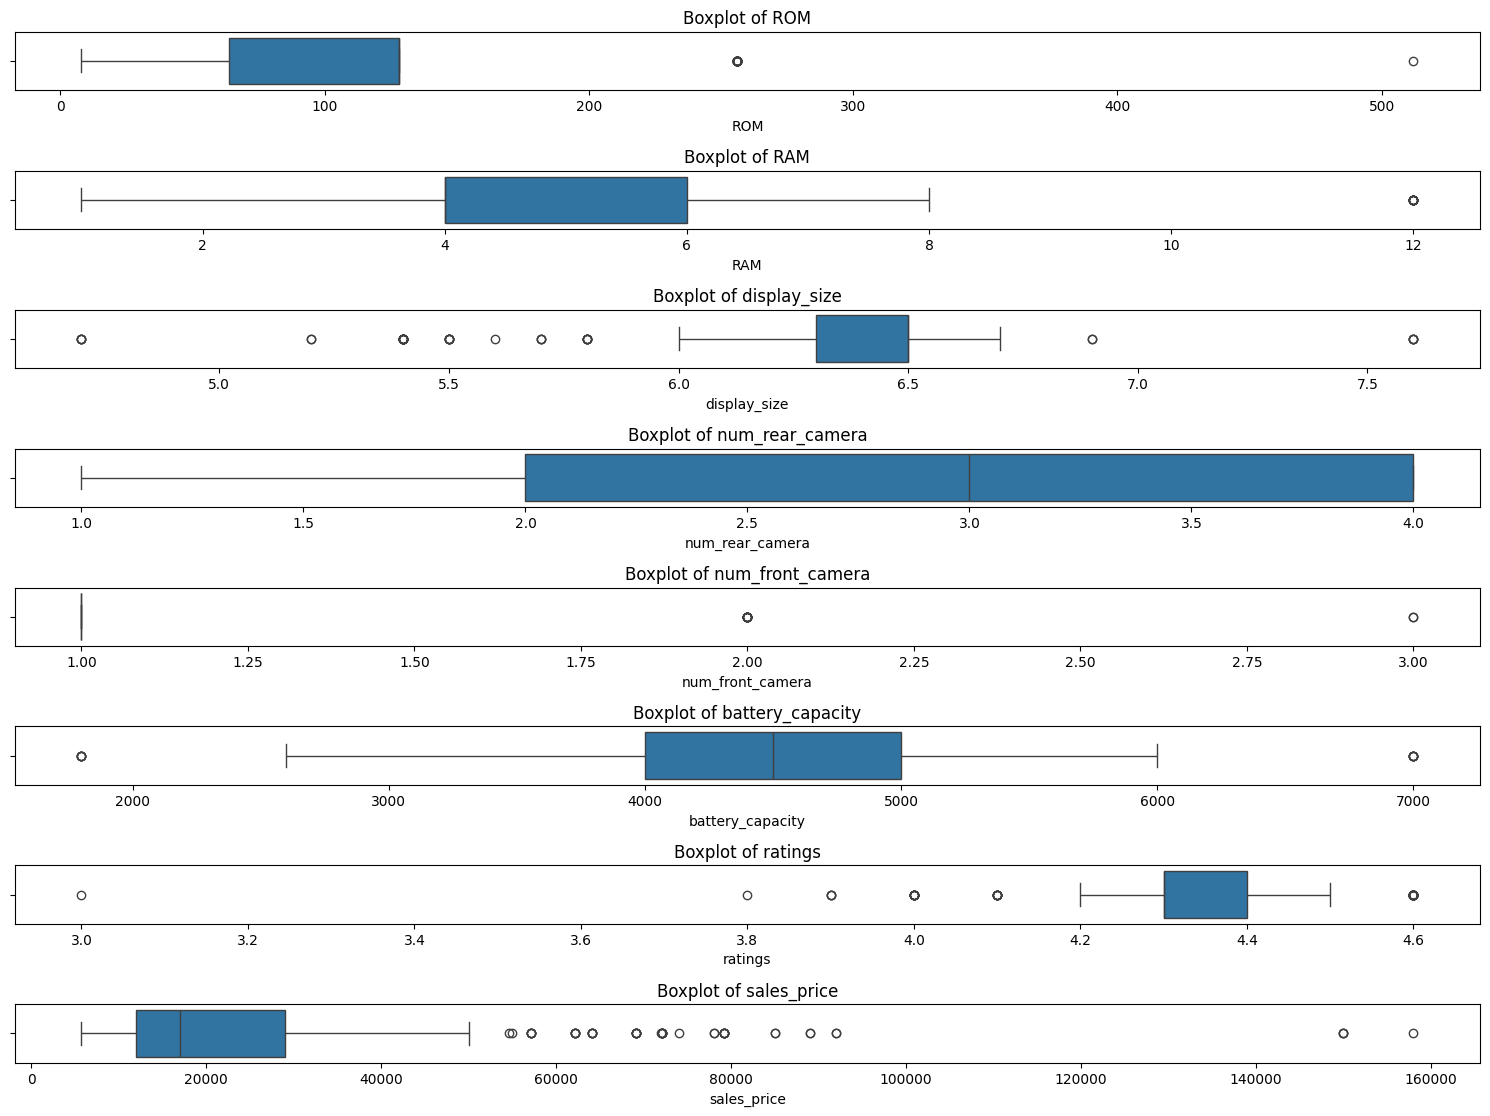

In [49]:
# Set the figure size
plt.figure(figsize=(15,15))

features=['ROM', 'RAM', 'display_size',
       'num_rear_camera', 'num_front_camera', 'battery_capacity', 'ratings',
       'sales_price']
# Iterate over columns
for i, column in enumerate(features):
    plt.subplot(len(df.columns), 1, i + 1)  # Create subplots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [50]:
# Dictionary to store outlier counts
outlier_counts = {}

for column in features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    outlier_counts[column] = outlier_count

# Convert the dictionary to a DataFrame for better visualization
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

print(outlier_counts_df)

             Column  Outlier Count
0               ROM             39
1               RAM             12
2      display_size             44
3   num_rear_camera              0
4  num_front_camera             17
5  battery_capacity             11
6           ratings             60
7       sales_price             49


In [51]:
def cap_outliers_iqr(df, columns):

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Sample usage with your DataFrame
columns_to_cap = ['ROM', 'RAM', 'display_size', 'num_front_camera', 'battery_capacity', 'ratings', 'sales_price']
df = cap_outliers_iqr(df, columns_to_cap)

# Now df has the outliers capped in the specified columns
display(df.head())


,brand,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price
0,Apple,Water,Very Small,64,2,6.0,1,1,2500,4.50,32999
1,Apple,Ceramic,Small,64,4,6.0,2,1,2815,4.50,54499
2,Apple,Water,Very Small,64,2,6.0,1,1,2500,4.50,32999
3,Apple,iOS,Medium,64,3,6.1,1,1,2942,4.55,42999
4,Apple,Ceramic,Medium,128,4,6.1,2,1,2815,4.55,54499


In [52]:
# Dictionary to store outlier counts
outlier_counts = {}

for column in features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    outlier_counts[column] = outlier_count

# Convert the dictionary to a DataFrame for better visualization
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

print(outlier_counts_df)

             Column  Outlier Count
0               ROM              0
1               RAM              0
2      display_size              0
3   num_rear_camera              0
4  num_front_camera              0
5  battery_capacity              0
6           ratings              0
7       sales_price              0


In [53]:
from sklearn.preprocessing import MinMaxScaler


# Alternatively, normalize data to the range [0, 1]
normalizer = MinMaxScaler()
df[[ 'ROM','battery_capacity']] = normalizer.fit_transform(df[[ 'ROM','battery_capacity']])


In [54]:
df.head()

,brand,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price
0,Apple,Water,Very Small,0.259259,2,6.0,1,1,0.00000,4.50,32999
1,Apple,Ceramic,Small,0.259259,4,6.0,2,1,0.07875,4.50,54499
2,Apple,Water,Very Small,0.259259,2,6.0,1,1,0.00000,4.50,32999
3,Apple,iOS,Medium,0.259259,3,6.1,1,1,0.11050,4.55,42999
4,Apple,Ceramic,Medium,0.555556,4,6.1,2,1,0.07875,4.55,54499


# Data Transformation:

In [55]:
df['brand'].value_counts(),df['processor'].value_counts(),df['screen_size'].value_counts()

(brand
 Realme     138
 Samsung    119
 Xiaomi      61
 Apple       56
 Poco        56
 Name: count, dtype: int64,
 processor
 Qualcomm    168
 MediaTek    144
 Exynos       53
 Ceramic      33
 iOS          12
 Water        11
 Others        9
 Name: count, dtype: int64,
 screen_size
 Large         242
 Medium        146
 Small          34
 Very Small      4
 Very Large      4
 Name: count, dtype: int64)

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Here are the categorical columns
categorical_columns = ['brand', 'processor', 'screen_size']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Check the transformed dataframe
df.head()


,brand,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price
0,0,5,4,0.259259,2,6.0,1,1,0.00000,4.50,32999
1,0,0,2,0.259259,4,6.0,2,1,0.07875,4.50,54499
2,0,5,4,0.259259,2,6.0,1,1,0.00000,4.50,32999
3,0,6,1,0.259259,3,6.1,1,1,0.11050,4.55,42999
4,0,0,1,0.555556,4,6.1,2,1,0.07875,4.55,54499


In [58]:
df.to_csv("cleaned_dataset.csv")